In [1]:
# import libraries
import pandas as pd
import requests
import io
# import emoji
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# from emoji import UNICODE_EMOJI

# download nltk corpus (first time only)
# import nltk

# nltk.download('all')

url = 'https://drive.google.com/file/d/18USQNPwgf-l_n__etgDi3EyQnHu3jfjE/view?usp=sharing'
file_id = url.split('/')[-2]
print(file_id)
download_url = f'https://drive.google.com/uc?id={file_id}'

# Bypass SSL certificate verification
response = requests.get(download_url, verify=False)

# Create a file-like object from the response content
csv_data = io.BytesIO(response.content)

# Read the CSV data into a DataFrame
data = pd.read_csv(csv_data)
# data

18USQNPwgf-l_n__etgDi3EyQnHu3jfjE


C:\Users\User\anaconda3\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doc-0k-8g-docs.googleusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [2]:
data

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,error,type
0,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,Looks ðŸ¤¤ yum,0.0,0.0,2023-10-17T11:40:44.000Z,1.803630e+16,1.810231e+10,2023-10-19T05:28:43.394Z,https://www.instagram.com/p/Cwo2wMwvfY4/,NaN,goodlato
1,https://scontent.cdninstagram.com/v/t51.2885-1...,cutieger2._,https://www.instagram.com/cutieger2._,ðŸ˜ðŸ˜ðŸ˜ðŸ˜ðŸ˜,0.0,0.0,2023-09-01T12:23:20.000Z,1.799330e+16,4.896693e+10,2023-10-19T05:28:43.394Z,https://www.instagram.com/p/Cwo2wMwvfY4/,NaN,goodlato
2,https://scontent.cdninstagram.com/v/t51.2885-1...,thehonestnutritionist_sg,https://www.instagram.com/thehonestnutritionis...,Good way to fight waste!,0.0,0.0,2023-09-28T11:24:48.000Z,1.801150e+16,3.995025e+10,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,NaN,goodlato
3,https://scontent.cdninstagram.com/v/t51.2885-1...,adventuresoflochjess,https://www.instagram.com/adventuresoflochjess,Ooooh love this!,1.0,0.0,2023-08-21T01:12:56.000Z,1.802900e+16,1.092688e+07,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,NaN,goodlato
4,https://scontent.cdninstagram.com/v/t51.2885-1...,jasminejtxy,https://www.instagram.com/jasminejtxy,amazing idea!! â¤ï¸,1.0,1.0,2023-08-19T23:21:33.000Z,1.786440e+16,5.629291e+09,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,NaN,goodlato
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,https://scontent.cdninstagram.com/v/t51.2885-1...,fattietummies,https://www.instagram.com/fattietummies,looks so creamy!!,0.0,0.0,2022-09-30T17:43:06.000Z,1.790790e+16,4.598174e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,NaN,goodlato
163,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,Looks greatðŸ˜ðŸ˜,0.0,0.0,2022-07-15T15:43:03.000Z,1.785630e+16,1.810231e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,NaN,goodlato
164,https://scontent.cdninstagram.com/v/t51.2885-1...,ck.chai,https://www.instagram.com/ck.chai,ðŸ˜ðŸ˜ðŸ˜,0.0,0.0,2022-06-15T06:45:52.000Z,1.796610e+16,4.427278e+07,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,NaN,goodlato
165,https://scontent.cdninstagram.com/v/t51.2885-1...,emuneats,https://www.instagram.com/emuneats,living for that stretchðŸ”¥ðŸ”¥ðŸ”¥,0.0,0.0,2022-06-13T11:09:31.000Z,1.795200e+16,3.823288e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,NaN,goodlato


In [3]:
data = data.drop(['error'], axis=1)
data = data.dropna(axis=0, how='any')
data

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type
0,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,Looks ðŸ¤¤ yum,0.0,0.0,2023-10-17T11:40:44.000Z,1.803630e+16,1.810231e+10,2023-10-19T05:28:43.394Z,https://www.instagram.com/p/Cwo2wMwvfY4/,goodlato
1,https://scontent.cdninstagram.com/v/t51.2885-1...,cutieger2._,https://www.instagram.com/cutieger2._,ðŸ˜ðŸ˜ðŸ˜ðŸ˜ðŸ˜,0.0,0.0,2023-09-01T12:23:20.000Z,1.799330e+16,4.896693e+10,2023-10-19T05:28:43.394Z,https://www.instagram.com/p/Cwo2wMwvfY4/,goodlato
2,https://scontent.cdninstagram.com/v/t51.2885-1...,thehonestnutritionist_sg,https://www.instagram.com/thehonestnutritionis...,Good way to fight waste!,0.0,0.0,2023-09-28T11:24:48.000Z,1.801150e+16,3.995025e+10,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato
3,https://scontent.cdninstagram.com/v/t51.2885-1...,adventuresoflochjess,https://www.instagram.com/adventuresoflochjess,Ooooh love this!,1.0,0.0,2023-08-21T01:12:56.000Z,1.802900e+16,1.092688e+07,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato
4,https://scontent.cdninstagram.com/v/t51.2885-1...,jasminejtxy,https://www.instagram.com/jasminejtxy,amazing idea!! â¤ï¸,1.0,1.0,2023-08-19T23:21:33.000Z,1.786440e+16,5.629291e+09,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato
...,...,...,...,...,...,...,...,...,...,...,...,...
162,https://scontent.cdninstagram.com/v/t51.2885-1...,fattietummies,https://www.instagram.com/fattietummies,looks so creamy!!,0.0,0.0,2022-09-30T17:43:06.000Z,1.790790e+16,4.598174e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato
163,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,Looks greatðŸ˜ðŸ˜,0.0,0.0,2022-07-15T15:43:03.000Z,1.785630e+16,1.810231e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato
164,https://scontent.cdninstagram.com/v/t51.2885-1...,ck.chai,https://www.instagram.com/ck.chai,ðŸ˜ðŸ˜ðŸ˜,0.0,0.0,2022-06-15T06:45:52.000Z,1.796610e+16,4.427278e+07,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato
165,https://scontent.cdninstagram.com/v/t51.2885-1...,emuneats,https://www.instagram.com/emuneats,living for that stretchðŸ”¥ðŸ”¥ðŸ”¥,0.0,0.0,2022-06-13T11:09:31.000Z,1.795200e+16,3.823288e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato


In [4]:
#filter the comments which contains emojis out
data['comment'] = data['comment'].str.replace('[^A-Za-z0-9\s]', '', flags=re.UNICODE)
filtered_data = data[data['comment'].str.len() > 0]

filtered_data

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type
0,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,Looks yum,0.0,0.0,2023-10-17T11:40:44.000Z,1.803630e+16,1.810231e+10,2023-10-19T05:28:43.394Z,https://www.instagram.com/p/Cwo2wMwvfY4/,goodlato
2,https://scontent.cdninstagram.com/v/t51.2885-1...,thehonestnutritionist_sg,https://www.instagram.com/thehonestnutritionis...,Good way to fight waste,0.0,0.0,2023-09-28T11:24:48.000Z,1.801150e+16,3.995025e+10,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato
3,https://scontent.cdninstagram.com/v/t51.2885-1...,adventuresoflochjess,https://www.instagram.com/adventuresoflochjess,Ooooh love this,1.0,0.0,2023-08-21T01:12:56.000Z,1.802900e+16,1.092688e+07,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato
4,https://scontent.cdninstagram.com/v/t51.2885-1...,jasminejtxy,https://www.instagram.com/jasminejtxy,amazing idea,1.0,1.0,2023-08-19T23:21:33.000Z,1.786440e+16,5.629291e+09,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato
5,https://scontent.cdninstagram.com/v/t51.2885-1...,fellfor.food,https://www.instagram.com/fellfor.food,love the ambience of the place wanna visit soon,2.0,1.0,2023-08-13T12:53:40.000Z,1.813270e+16,5.521964e+10,2023-10-19T05:29:19.661Z,https://www.instagram.com/p/Cv4SWXROn46/,goodlato
...,...,...,...,...,...,...,...,...,...,...,...,...
161,https://scontent.cdninstagram.com/v/t51.2885-1...,lowcalproducts,https://www.instagram.com/lowcalproducts,omg that texture shot tho just found you guys,1.0,2.0,2022-10-09T17:16:47.000Z,1.814750e+16,4.502626e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato
162,https://scontent.cdninstagram.com/v/t51.2885-1...,fattietummies,https://www.instagram.com/fattietummies,looks so creamy,0.0,0.0,2022-09-30T17:43:06.000Z,1.790790e+16,4.598174e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato
163,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,Looks great,0.0,0.0,2022-07-15T15:43:03.000Z,1.785630e+16,1.810231e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato
165,https://scontent.cdninstagram.com/v/t51.2885-1...,emuneats,https://www.instagram.com/emuneats,living for that stretch,0.0,0.0,2022-06-13T11:09:31.000Z,1.795200e+16,3.823288e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato


In [5]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]


    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# apply the function df
filtered_data['comment'] = filtered_data['comment'].apply(preprocess_text)
filtered_data

<ipython-input-5-28a879573750>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['comment'] = filtered_data['comment'].apply(preprocess_text)


,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type
0,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,look yum,0.0,0.0,2023-10-17T11:40:44.000Z,1.803630e+16,1.810231e+10,2023-10-19T05:28:43.394Z,https://www.instagram.com/p/Cwo2wMwvfY4/,goodlato
2,https://scontent.cdninstagram.com/v/t51.2885-1...,thehonestnutritionist_sg,https://www.instagram.com/thehonestnutritionis...,good way fight waste,0.0,0.0,2023-09-28T11:24:48.000Z,1.801150e+16,3.995025e+10,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato
3,https://scontent.cdninstagram.com/v/t51.2885-1...,adventuresoflochjess,https://www.instagram.com/adventuresoflochjess,ooooh love,1.0,0.0,2023-08-21T01:12:56.000Z,1.802900e+16,1.092688e+07,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato
4,https://scontent.cdninstagram.com/v/t51.2885-1...,jasminejtxy,https://www.instagram.com/jasminejtxy,amazing idea,1.0,1.0,2023-08-19T23:21:33.000Z,1.786440e+16,5.629291e+09,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato
5,https://scontent.cdninstagram.com/v/t51.2885-1...,fellfor.food,https://www.instagram.com/fellfor.food,love ambience place wan na visit soon,2.0,1.0,2023-08-13T12:53:40.000Z,1.813270e+16,5.521964e+10,2023-10-19T05:29:19.661Z,https://www.instagram.com/p/Cv4SWXROn46/,goodlato
...,...,...,...,...,...,...,...,...,...,...,...,...
161,https://scontent.cdninstagram.com/v/t51.2885-1...,lowcalproducts,https://www.instagram.com/lowcalproducts,omg texture shot tho found guy,1.0,2.0,2022-10-09T17:16:47.000Z,1.814750e+16,4.502626e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato
162,https://scontent.cdninstagram.com/v/t51.2885-1...,fattietummies,https://www.instagram.com/fattietummies,look creamy,0.0,0.0,2022-09-30T17:43:06.000Z,1.790790e+16,4.598174e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato
163,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,look great,0.0,0.0,2022-07-15T15:43:03.000Z,1.785630e+16,1.810231e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato
165,https://scontent.cdninstagram.com/v/t51.2885-1...,emuneats,https://www.instagram.com/emuneats,living stretch,0.0,0.0,2022-06-13T11:09:31.000Z,1.795200e+16,3.823288e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato


In [6]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# apply get_sentiment function

filtered_data['sentiment'] = filtered_data['comment'].apply(get_sentiment)
filtered_data

<ipython-input-6-8b2913775384>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment'] = filtered_data['comment'].apply(get_sentiment)


,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type,sentiment
0,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,look yum,0.0,0.0,2023-10-17T11:40:44.000Z,1.803630e+16,1.810231e+10,2023-10-19T05:28:43.394Z,https://www.instagram.com/p/Cwo2wMwvfY4/,goodlato,0
2,https://scontent.cdninstagram.com/v/t51.2885-1...,thehonestnutritionist_sg,https://www.instagram.com/thehonestnutritionis...,good way fight waste,0.0,0.0,2023-09-28T11:24:48.000Z,1.801150e+16,3.995025e+10,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato,1
3,https://scontent.cdninstagram.com/v/t51.2885-1...,adventuresoflochjess,https://www.instagram.com/adventuresoflochjess,ooooh love,1.0,0.0,2023-08-21T01:12:56.000Z,1.802900e+16,1.092688e+07,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato,1
4,https://scontent.cdninstagram.com/v/t51.2885-1...,jasminejtxy,https://www.instagram.com/jasminejtxy,amazing idea,1.0,1.0,2023-08-19T23:21:33.000Z,1.786440e+16,5.629291e+09,2023-10-19T05:29:00.413Z,https://www.instagram.com/p/CwIxpq9sSca/,goodlato,1
5,https://scontent.cdninstagram.com/v/t51.2885-1...,fellfor.food,https://www.instagram.com/fellfor.food,love ambience place wan na visit soon,2.0,1.0,2023-08-13T12:53:40.000Z,1.813270e+16,5.521964e+10,2023-10-19T05:29:19.661Z,https://www.instagram.com/p/Cv4SWXROn46/,goodlato,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,https://scontent.cdninstagram.com/v/t51.2885-1...,lowcalproducts,https://www.instagram.com/lowcalproducts,omg texture shot tho found guy,1.0,2.0,2022-10-09T17:16:47.000Z,1.814750e+16,4.502626e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato,0
162,https://scontent.cdninstagram.com/v/t51.2885-1...,fattietummies,https://www.instagram.com/fattietummies,look creamy,0.0,0.0,2022-09-30T17:43:06.000Z,1.790790e+16,4.598174e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato,0
163,https://scontent.cdninstagram.com/v/t51.2885-1...,icucvc4ever,https://www.instagram.com/icucvc4ever,look great,0.0,0.0,2022-07-15T15:43:03.000Z,1.785630e+16,1.810231e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato,1
165,https://scontent.cdninstagram.com/v/t51.2885-1...,emuneats,https://www.instagram.com/emuneats,living stretch,0.0,0.0,2022-06-13T11:09:31.000Z,1.795200e+16,3.823288e+10,2023-10-19T05:33:09.997Z,https://www.instagram.com/p/Cd-3zCvv_1e/,goodlato,0


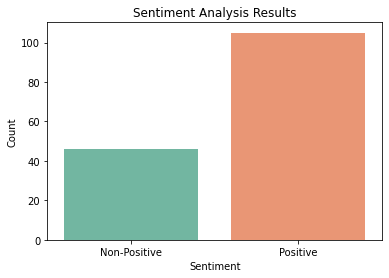

In [9]:
#Visualisation1
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = filtered_data['sentiment'].value_counts()
# print(sentiment_counts)
# Plotting the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.xticks(ticks=[0, 1], labels=['Non-Positive', 'Positive'])
plt.show()